<a href="https://colab.research.google.com/github/nyayuchika/pcd-coursework/blob/master/PCD_Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dengan input citra

(512, 512)


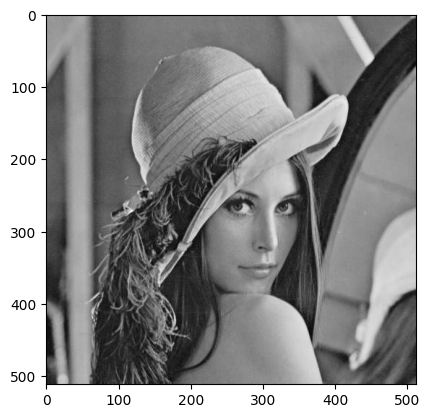

In [47]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('pcd_test.jpg', 0)
plt.imshow(img, cmap='gray')
print(img.shape)

##Upsampling

In [50]:
#Generate Matrix
import numpy as np
dimension = img.shape
m = dimension[0]
n = dimension[1]
print(f"Banyak baris {m}")
print(f"Banyak kolom {n}")
a = img
print(a)

Banyak baris 512
Banyak kolom 512
[[162 161 160 ... 171 154 129]
 [162 162 161 ... 173 158 133]
 [163 162 161 ... 171 155 128]
 ...
 [ 42  45  49 ... 102 103 103]
 [ 41  45  50 ... 105 107 109]
 [ 41  45  51 ... 102 105 107]]


###Nearest Neighbor

In [51]:
print(a)

[[162 161 160 ... 171 154 129]
 [162 162 161 ... 173 158 133]
 [163 162 161 ... 171 155 128]
 ...
 [ 42  45  49 ... 102 103 103]
 [ 41  45  50 ... 105 107 109]
 [ 41  45  51 ... 102 105 107]]


In [52]:
def floor(x):
  if x>=0:
    return int(x)
  else:
    return int(x)-1

In [53]:
def minimum(x, y):
  if x < y:
    return x
  else:
    return y

def minimum2(x):
  if len(x)==0:
    return 0
  min_val=x[0]
  for v in x[1:]:
    if v<min_val:
      min_val=v
  return min_val

In [54]:
scale_factor = 2

def nn_upsampling(matriks, scale_factor):
  m, n = matriks.shape
  m_new = m * scale_factor
  n_new = n * scale_factor
  a_new = np.zeros((m_new,n_new))
  for i in range(m_new):
    for j in range(n_new):
      i2 = i/scale_factor
      j2 = j/scale_factor

      # baris
      row_floor = int(floor(i2))
      row_ceil = minimum(m-1, row_floor+1)
      row_df = i2-row_floor
      row_dc = row_ceil-i2
      if row_df < row_dc:
        rows = [row_floor]
      elif row_df > row_dc:
        rows = [row_ceil]
      else: #sama
        rows = [row_floor, row_ceil]

      #kolom
      col_floor = int(floor(j2))
      col_ceil = minimum(n-1, col_floor+1)
      col_df = j2-col_floor
      col_dc = col_ceil-j2
      if col_df < col_dc:
        cols = [col_floor]
      elif col_df > col_dc:
        cols = [col_ceil]
      else: #sama
        cols = [col_floor, col_ceil]

      kandidat = []
      for r in rows:
        for c in cols:
          kandidat.append(a[r, c])
      a_new[i,j] = minimum2(kandidat)
  return a_new

a_nn = nn_upsampling(a, scale_factor)
print(f"Matriks awal: \n{a}\n")
print(f"Matriks setelah upsampling: \n{a_nn}")
print(a_nn.shape)

Matriks awal: 
[[162 161 160 ... 171 154 129]
 [162 162 161 ... 173 158 133]
 [163 162 161 ... 171 155 128]
 ...
 [ 42  45  49 ... 102 103 103]
 [ 41  45  50 ... 105 107 109]
 [ 41  45  51 ... 102 105 107]]

Matriks setelah upsampling: 
[[162. 161. 161. ... 129. 129. 129.]
 [162. 161. 161. ... 129. 129. 129.]
 [162. 162. 162. ... 133. 133. 133.]
 ...
 [ 41.  41.  45. ... 105. 107. 107.]
 [ 41.  41.  45. ... 105. 107. 107.]
 [ 41.  41.  45. ... 105. 107. 107.]]
(1024, 1024)


In [65]:
from PIL import Image
image = Image.fromarray(a_nn)
image.show()

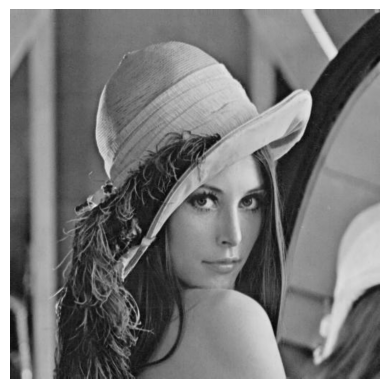

In [68]:
plt.imshow(a_nn, cmap='gray') # Use cmap='gray' for grayscale images
plt.axis('off') # Turn off axes for a clean image
plt.savefig("upsampled_image_mpl.png")
plt.show() # Display the image

###Bilinear

In [55]:
print(a)

[[162 161 160 ... 171 154 129]
 [162 162 161 ... 173 158 133]
 [163 162 161 ... 171 155 128]
 ...
 [ 42  45  49 ... 102 103 103]
 [ 41  45  50 ... 105 107 109]
 [ 41  45  51 ... 102 105 107]]


In [56]:
scale_factor = 2

def bilinear_upsampling(matriks, scale_factor):
  m, n = matriks.shape
  m_new = m * scale_factor
  n_new = n * scale_factor
  a_new = np.zeros((m_new,n_new))
  for i in range(m_new):
    for j in range(n_new):
      i2 = i / scale_factor
      j2 = j / scale_factor

      # Cari floor & ceil untuk baris dan kolom
      r0 = int(floor(i2))
      c0 = int(floor(j2))
      r1 = min(m-1, r0+1)
      c1 = min(n-1, c0+1)

      # Hitung jarak pecahan
      dy = i2 - r0
      dx = j2 - c0

      # Ambil 4 tetangga
      v00 = a[r0, c0]  # kiri-bawah
      v01 = a[r0, c1]  # kanan-bawah
      v10 = a[r1, c0]  # kiri-atas
      v11 = a[r1, c1]  # kanan-atas

      # Bilinear interpolation
      a_new[i, j] = (1-dx)*(1-dy)*v00 + dx*(1-dy)*v01 + (1-dx)*dy*v10 + dx*dy*v11
  return a_new

a_bilinear = bilinear_upsampling(a, scale_factor)
print(f"Matriks awal: \n{a}\n")
print(f"Matriks setelah bilinear upsampling: \n{a_bilinear}")
print(a_bilinear.shape)

Matriks awal: 
[[162 161 160 ... 171 154 129]
 [162 162 161 ... 173 158 133]
 [163 162 161 ... 171 155 128]
 ...
 [ 42  45  49 ... 102 103 103]
 [ 41  45  50 ... 105 107 109]
 [ 41  45  51 ... 102 105 107]]

Matriks setelah bilinear upsampling: 
[[162.   161.5  161.   ... 141.5  129.   129.  ]
 [162.   161.75 161.5  ... 143.5  131.   131.  ]
 [162.   162.   162.   ... 145.5  133.   133.  ]
 ...
 [ 41.    43.    45.   ... 107.   108.   108.  ]
 [ 41.    43.    45.   ... 106.   107.   107.  ]
 [ 41.    43.    45.   ... 106.   107.   107.  ]]
(1024, 1024)


###Bicubic

In [57]:
print(a)

[[162 161 160 ... 171 154 129]
 [162 162 161 ... 173 158 133]
 [163 162 161 ... 171 155 128]
 ...
 [ 42  45  49 ... 102 103 103]
 [ 41  45  50 ... 105 107 109]
 [ 41  45  51 ... 102 105 107]]


In [58]:
def cubic_weight(t):
    t = abs(t)
    if t <= 1:
        return (1.5 * t**3 - 2.5 * t**2 + 1)
    elif t < 2:
        return (-0.5 * t**3 + 2.5 * t**2 - 4*t + 2)
    else:
        return 0

scale_factor = 2
def bicubic_upsampling(a, scale_factor):
  m, n = a.shape  # asumsi 'a' sudah ada
  m_new = m * scale_factor
  n_new = n * scale_factor
  a_new = np.zeros((m_new,n_new))

  for i in range(m_new):
    for j in range(n_new):
      # Koordinat di gambar lama
      i2 = i / scale_factor
      j2 = j / scale_factor

      i0 = int(floor(i2))
      j0 = int(floor(j2))

      # Loop 4x4 tetangga
      val = 0
      wsum = 0
      for di in range(-1, 3):  # -1,0,1,2
          for dj in range(-1, 3):
              r = min(max(i0+di, 0), m-1)  # clamp ke batas matriks
              c = min(max(j0+dj, 0), n-1)
              w = cubic_weight(i2 - (i0+di)) * cubic_weight(j2 - (j0+dj))
              val += a[r,c] * w
              wsum += w
      if wsum != 0:
          a_new[i,j] = val / wsum
  return a_new

a_bicubic = bicubic_upsampling(a, scale_factor)
print(f"Matriks awal: \n{a}\n")
print(f"Matriks setelah bicubic upsampling: \n{a_bicubic}")
print(a_bicubic.shape)

Matriks awal: 
[[162 161 160 ... 171 154 129]
 [162 162 161 ... 173 158 133]
 [163 162 161 ... 171 155 128]
 ...
 [ 42  45  49 ... 102 103 103]
 [ 41  45  50 ... 105 107 109]
 [ 41  45  51 ... 102 105 107]]

Matriks setelah bicubic upsampling: 
[[162.         161.5625     161.         ... 140.4375     129.
  127.4375    ]
 [161.9375     161.78125    161.5        ... 142.75390625 131.3125
  129.7578125 ]
 [162.         162.0625     162.         ... 144.5625     133.
  131.4375    ]
 ...
 [ 40.9375      42.62109375  45.         ... 107.47265625 108.375
  108.5078125 ]
 [ 41.          42.625       45.         ... 106.1875     107.
  107.125     ]
 [ 41.          42.62109375  45.         ... 106.06640625 106.875
  107.        ]]
(1024, 1024)


###Conclusion

In [59]:
print(f"""The result from downsampling method:
Before upsampling: \n{a} \n\nAfter upsampling:
1. Nearest Neighbor: \n{a_nn} \n\n2. Bilinear: \n{a_bilinear} \n\n3. Bicubic: \n{a_bicubic}""")

The result from downsampling method:
Before upsampling: 
[[162 161 160 ... 171 154 129]
 [162 162 161 ... 173 158 133]
 [163 162 161 ... 171 155 128]
 ...
 [ 42  45  49 ... 102 103 103]
 [ 41  45  50 ... 105 107 109]
 [ 41  45  51 ... 102 105 107]] 

After upsampling:
1. Nearest Neighbor: 
[[162. 161. 161. ... 129. 129. 129.]
 [162. 161. 161. ... 129. 129. 129.]
 [162. 162. 162. ... 133. 133. 133.]
 ...
 [ 41.  41.  45. ... 105. 107. 107.]
 [ 41.  41.  45. ... 105. 107. 107.]
 [ 41.  41.  45. ... 105. 107. 107.]] 

2. Bilinear: 
[[162.   161.5  161.   ... 141.5  129.   129.  ]
 [162.   161.75 161.5  ... 143.5  131.   131.  ]
 [162.   162.   162.   ... 145.5  133.   133.  ]
 ...
 [ 41.    43.    45.   ... 107.   108.   108.  ]
 [ 41.    43.    45.   ... 106.   107.   107.  ]
 [ 41.    43.    45.   ... 106.   107.   107.  ]] 

3. Bicubic: 
[[162.         161.5625     161.         ... 140.4375     129.
  127.4375    ]
 [161.9375     161.78125    161.5        ... 142.75390625 131.3125
  12

##Downsampling

In [18]:
#Generate Matrix
import numpy as np
m = 0
n = 0
m = input("Masukkan banyak baris = ")
n = input("Masukkan banyak kolom = ")
print(f"Banyak baris {m}")
print(f"Banyak kolom {n}")
m = int(m)
n = int(n)
b = np.random.randint(10, size=(m,n))
print(b)

Masukkan banyak baris = 6
Masukkan banyak kolom = 6
Banyak baris 6
Banyak kolom 6
[[5 6 0 6 0 9]
 [3 9 1 4 8 3]
 [3 0 3 5 7 6]
 [7 2 1 2 6 0]
 [4 5 0 1 6 9]
 [0 9 8 9 1 5]]


###Max

In [31]:
print(b)
print(b.shape)

[[5 6 0 6 0 9]
 [3 9 1 4 8 3]
 [3 0 3 5 7 6]
 [7 2 1 2 6 0]
 [4 5 0 1 6 9]
 [0 9 8 9 1 5]]
(6, 6)


In [32]:
def max_downsampling(matriks, block_size=(2,2)):
    rows, cols = block_size
    max_matriks = []

    for i in range(0, matriks.shape[0], rows):
        row_list = []
        for j in range(0, matriks.shape[1], cols):
            block = matriks[i:i+rows, j:j+cols]
            block_flat = block.flatten()
            max_val = block_flat[0]
            for val in block_flat:
                if val > max_val:
                    max_val = val
            row_list.append(np.max(block))
        max_matriks.append(row_list)

    return np.array(max_matriks)

print("Matriks asli:")
print(b)

print("\nMatriks Downsampling Max:")
print(max_downsampling(b, (2,2)))
b_max = max_downsampling(b, (2,2))

Matriks asli:
[[5 6 0 6 0 9]
 [3 9 1 4 8 3]
 [3 0 3 5 7 6]
 [7 2 1 2 6 0]
 [4 5 0 1 6 9]
 [0 9 8 9 1 5]]

Matriks Downsampling Max:
[[9 6 9]
 [7 5 7]
 [9 9 9]]


###Median

In [21]:
print(b)

[[5 6 0 6 0 9]
 [3 9 1 4 8 3]
 [3 0 3 5 7 6]
 [7 2 1 2 6 0]
 [4 5 0 1 6 9]
 [0 9 8 9 1 5]]


In [22]:
def median_downsampling(matriks, block_size=(2,2)):
    rows, cols = block_size
    median_matriks = []

    for i in range(0, matriks.shape[0], rows):
        row_list = []
        for j in range(0, matriks.shape[1], cols):
            block = matriks[i:i+rows, j:j+cols]
            block_flat = np.sort(block.flatten())   # urutkan 1D

            n = len(block_flat)
            if n % 2 == 1:   # jumlah ganjil → ambil tengah langsung
                med_val = block_flat[n // 2]
            else:            # jumlah genap → rata-rata dua nilai tengah
                med_val = (block_flat[n//2 - 1] + block_flat[n//2]) / 2

            row_list.append(int(med_val))  # ubah ke int kalau mau konsisten
        median_matriks.append(row_list)

    return np.array(median_matriks)

print("Matriks asli:")
print(b)

print("\nMatriks Downsampling Median:")
print(median_downsampling(b, (2,2)))
b_median = median_downsampling(b, (2,2))

Matriks asli:
[[5 6 0 6 0 9]
 [3 9 1 4 8 3]
 [3 0 3 5 7 6]
 [7 2 1 2 6 0]
 [4 5 0 1 6 9]
 [0 9 8 9 1 5]]

Matriks Downsampling Median:
[[5 2 5]
 [2 2 6]
 [4 4 5]]


###Mean

In [23]:
print(b)
print(b.shape)

[[5 6 0 6 0 9]
 [3 9 1 4 8 3]
 [3 0 3 5 7 6]
 [7 2 1 2 6 0]
 [4 5 0 1 6 9]
 [0 9 8 9 1 5]]
(6, 6)


In [24]:
def mean_downsampling(matriks, block_size=(2,2)):
    rows, cols = block_size
    mean_matriks = []

    for i in range(0, matriks.shape[0], rows):
        row_list = []
        for j in range(0, matriks.shape[1], cols):
            block = matriks[i:i+rows, j:j+cols]
            block_flat = block.flatten()
            mean_val = sum(block_flat) / len(block_flat)
            row_list.append(mean_val)
        mean_matriks.append(row_list)

    return np.array(mean_matriks)

print("Matriks asli:")
print(b)

print("\nMatriks Downsampling Mean:")
print(mean_downsampling(b, (2,2)))
b_mean = mean_downsampling(b, (2,2))

Matriks asli:
[[5 6 0 6 0 9]
 [3 9 1 4 8 3]
 [3 0 3 5 7 6]
 [7 2 1 2 6 0]
 [4 5 0 1 6 9]
 [0 9 8 9 1 5]]

Matriks Downsampling Mean:
[[5.75 2.75 5.  ]
 [3.   2.75 4.75]
 [4.5  4.5  5.25]]


###Conclusion

In [25]:
print(f"""The result from downsampling method:
Before downsampling: \n{b} \n\nAfter downsampling:
1. Max: \n{b_max} \n\n2. Median: \n{b_median} \n\n3. Mean: \n{b_mean}""")

The result from downsampling method:
Before downsampling: 
[[5 6 0 6 0 9]
 [3 9 1 4 8 3]
 [3 0 3 5 7 6]
 [7 2 1 2 6 0]
 [4 5 0 1 6 9]
 [0 9 8 9 1 5]] 

After downsampling:
1. Max: 
[[9 6 9]
 [7 5 7]
 [9 9 9]] 

2. Median: 
[[5 2 5]
 [2 2 6]
 [4 4 5]] 

3. Mean: 
[[5.75 2.75 5.  ]
 [3.   2.75 4.75]
 [4.5  4.5  5.25]]


#Hanya fokus menggunakan matriks

##Upsampling

In [ ]:
#Generate Matrix
import numpy as np
m = 0
n = 0
m = input("Masukkan banyak baris = ")
n = input("Masukkan banyak kolom = ")
print(f"Banyak baris {m}")
print(f"Banyak kolom {n}")
m = int(m)
n = int(n)
a = np.random.randint(10, size=(m,n))
print(a)

Masukkan banyak baris = 2
Masukkan banyak kolom = 2
Banyak baris 2
Banyak kolom 2
[[7 2]
 [5 9]]


###Nearest Neighbor

In [ ]:
print(a)

[[7 2]
 [5 9]]


In [ ]:
def floor(x):
  if x>=0:
    return int(x)
  else:
    return int(x)-1

In [ ]:
def minimum(x, y):
  if x < y:
    return x
  else:
    return y

def minimum2(x):
  if len(x)==0:
    return 0
  min_val=x[0]
  for v in x[1:]:
    if v<min_val:
      min_val=v
  return min_val

In [ ]:
scale_factor = 2

def nn_upsampling(matriks, scale_factor):
  m, n = matriks.shape
  m_new = m * scale_factor
  n_new = n * scale_factor
  a_new = np.zeros((m_new,n_new))
  for i in range(m_new):
    for j in range(n_new):
      i2 = i/scale_factor
      j2 = j/scale_factor

      # baris
      row_floor = int(floor(i2))
      row_ceil = minimum(m-1, row_floor+1)
      row_df = i2-row_floor
      row_dc = row_ceil-i2
      if row_df < row_dc:
        rows = [row_floor]
      elif row_df > row_dc:
        rows = [row_ceil]
      else: #sama
        rows = [row_floor, row_ceil]

      #kolom
      col_floor = int(floor(j2))
      col_ceil = minimum(n-1, col_floor+1)
      col_df = j2-col_floor
      col_dc = col_ceil-j2
      if col_df < col_dc:
        cols = [col_floor]
      elif col_df > col_dc:
        cols = [col_ceil]
      else: #sama
        cols = [col_floor, col_ceil]

      kandidat = []
      for r in rows:
        for c in cols:
          kandidat.append(a[r, c])
      a_new[i,j] = minimum2(kandidat)
  return a_new

a_nn = nn_upsampling(a, scale_factor)
print(f"Matriks awal: \n{a}\n")
print(f"Matriks setelah upsampling: \n{a_nn}")
print(a_nn.shape)

Matriks awal: 
[[7 2]
 [5 9]]

Matriks setelah upsampling: 
[[7. 2. 2. 2.]
 [5. 2. 2. 2.]
 [5. 5. 9. 9.]
 [5. 5. 9. 9.]]
(4, 4)


###Bilinear

In [ ]:
print(a)

[[7 2]
 [5 9]]


In [ ]:
scale_factor = 2

def bilinear_upsampling(matriks, scale_factor):
  m, n = matriks.shape
  m_new = m * scale_factor
  n_new = n * scale_factor
  a_new = np.zeros((m_new,n_new))
  for i in range(m_new):
    for j in range(n_new):
      i2 = i / scale_factor
      j2 = j / scale_factor

      # Cari floor & ceil untuk baris dan kolom
      r0 = int(floor(i2))
      c0 = int(floor(j2))
      r1 = min(m-1, r0+1)
      c1 = min(n-1, c0+1)

      # Hitung jarak pecahan
      dy = i2 - r0
      dx = j2 - c0

      # Ambil 4 tetangga
      v00 = a[r0, c0]  # kiri-bawah
      v01 = a[r0, c1]  # kanan-bawah
      v10 = a[r1, c0]  # kiri-atas
      v11 = a[r1, c1]  # kanan-atas

      # Bilinear interpolation
      a_new[i, j] = (1-dx)*(1-dy)*v00 + dx*(1-dy)*v01 + (1-dx)*dy*v10 + dx*dy*v11
  return a_new

a_bilinear = bilinear_upsampling(a, scale_factor)
print(f"Matriks awal: \n{a}\n")
print(f"Matriks setelah bilinear upsampling: \n{a_bilinear}")
print(a_bilinear.shape)

Matriks awal: 
[[7 2]
 [5 9]]

Matriks setelah bilinear upsampling: 
[[7.   4.5  2.   2.  ]
 [6.   5.75 5.5  5.5 ]
 [5.   7.   9.   9.  ]
 [5.   7.   9.   9.  ]]
(4, 4)


###Bicubic

In [ ]:
print(a)

[[9 8]
 [7 6]]


In [ ]:
def cubic_weight(t):
    t = abs(t)
    if t <= 1:
        return (1.5 * t**3 - 2.5 * t**2 + 1)
    elif t < 2:
        return (-0.5 * t**3 + 2.5 * t**2 - 4*t + 2)
    else:
        return 0

scale_factor = 2
def bicubic_upsampling(a, scale_factor):
  m, n = a.shape  # asumsi 'a' sudah ada
  m_new = m * scale_factor
  n_new = n * scale_factor
  a_new = np.zeros((m_new,n_new))

  for i in range(m_new):
    for j in range(n_new):
      # Koordinat di gambar lama
      i2 = i / scale_factor
      j2 = j / scale_factor

      i0 = int(floor(i2))
      j0 = int(floor(j2))

      # Loop 4x4 tetangga
      val = 0
      wsum = 0
      for di in range(-1, 3):  # -1,0,1,2
          for dj in range(-1, 3):
              r = min(max(i0+di, 0), m-1)  # clamp ke batas matriks
              c = min(max(j0+dj, 0), n-1)
              w = cubic_weight(i2 - (i0+di)) * cubic_weight(j2 - (j0+dj))
              val += a[r,c] * w
              wsum += w
      if wsum != 0:
          a_new[i,j] = val / wsum
  return a_new

a_bicubic = bicubic_upsampling(a, scale_factor)
print(f"Matriks awal: \n{a}\n")
print(f"Matriks setelah bicubic upsampling: \n{a_bicubic}")
print(a_bicubic.shape)

Matriks awal: 
[[7 2]
 [5 9]]

Matriks setelah bicubic upsampling: 
[[7.         4.5        2.         1.6875    ]
 [6.         5.75       5.5        5.46875   ]
 [5.         7.         9.         9.25      ]
 [4.875      7.15625    9.4375     9.72265625]]
(4, 4)


###Conclusion

In [ ]:
print(f"""The result from downsampling method:
Before upsampling: \n{a} \n\nAfter upsampling:
1. Nearest Neighbor: \n{a_nn} \n\n2. Bilinear: \n{a_bilinear} \n\n3. Bicubic: \n{a_bicubic}""")

The result from downsampling method:
Before upsampling: 
[[7 2]
 [5 9]] 

After upsampling:
1. Nearest Neighbor: 
[[7. 2. 2. 2.]
 [5. 2. 2. 2.]
 [5. 5. 9. 9.]
 [5. 5. 9. 9.]] 

2. Bilinear: 
[[7.   4.5  2.   2.  ]
 [6.   5.75 5.5  5.5 ]
 [5.   7.   9.   9.  ]
 [5.   7.   9.   9.  ]] 

3. Bicubic: 
[[7.         4.5        2.         1.6875    ]
 [6.         5.75       5.5        5.46875   ]
 [5.         7.         9.         9.25      ]
 [4.875      7.15625    9.4375     9.72265625]]


##Downsampling

In [ ]:
#Generate Matrix
import numpy as np
m = 0
n = 0
m = input("Masukkan banyak baris = ")
n = input("Masukkan banyak kolom = ")
print(f"Banyak baris {m}")
print(f"Banyak kolom {n}")
m = int(m)
n = int(n)
b = np.random.randint(10, size=(m,n))
print(b)

Masukkan banyak baris = 6
Masukkan banyak kolom = 6
Banyak baris 6
Banyak kolom 6
[[5 6 0 6 0 9]
 [3 9 1 4 8 3]
 [3 0 3 5 7 6]
 [7 2 1 2 6 0]
 [4 5 0 1 6 9]
 [0 9 8 9 1 5]]


###Max

In [ ]:
print(b)
print(b.shape)

[[5 6 0 6 0 9]
 [3 9 1 4 8 3]
 [3 0 3 5 7 6]
 [7 2 1 2 6 0]
 [4 5 0 1 6 9]
 [0 9 8 9 1 5]]
(6, 6)


In [ ]:
def max_downsampling(matriks, block_size=(2,2)):
    rows, cols = block_size
    max_matriks = []

    for i in range(0, matriks.shape[0], rows):
        row_list = []
        for j in range(0, matriks.shape[1], cols):
            block = matriks[i:i+rows, j:j+cols]
            block_flat = block.flatten()
            max_val = block_flat[0]
            for val in block_flat:
                if val > max_val:
                    max_val = val
            row_list.append(np.max(block))
        max_matriks.append(row_list)

    return np.array(max_matriks)

print("Matriks asli:")
print(b)

print("\nMatriks Downsampling Max:")
print(max_downsampling(b, (2,2)))
b_max = max_downsampling(b, (2,2))

Matriks asli:
[[5 6 0 6 0 9]
 [3 9 1 4 8 3]
 [3 0 3 5 7 6]
 [7 2 1 2 6 0]
 [4 5 0 1 6 9]
 [0 9 8 9 1 5]]

Matriks Downsampling Max:
[[9 6 9]
 [7 5 7]
 [9 9 9]]


###Median

In [ ]:
print(b)

[[5 6 0 6 0 9]
 [3 9 1 4 8 3]
 [3 0 3 5 7 6]
 [7 2 1 2 6 0]
 [4 5 0 1 6 9]
 [0 9 8 9 1 5]]


In [ ]:
def median_downsampling(matriks, block_size=(2,2)):
    rows, cols = block_size
    median_matriks = []

    for i in range(0, matriks.shape[0], rows):
        row_list = []
        for j in range(0, matriks.shape[1], cols):
            block = matriks[i:i+rows, j:j+cols]
            block_flat = np.sort(block.flatten())   # urutkan 1D

            n = len(block_flat)
            if n % 2 == 1:   # jumlah ganjil → ambil tengah langsung
                med_val = block_flat[n // 2]
            else:            # jumlah genap → rata-rata dua nilai tengah
                med_val = (block_flat[n//2 - 1] + block_flat[n//2]) / 2

            row_list.append(int(med_val))  # ubah ke int kalau mau konsisten
        median_matriks.append(row_list)

    return np.array(median_matriks)

print("Matriks asli:")
print(b)

print("\nMatriks Downsampling Median:")
print(median_downsampling(b, (2,2)))
b_median = median_downsampling(b, (2,2))

Matriks asli:
[[5 6 0 6 0 9]
 [3 9 1 4 8 3]
 [3 0 3 5 7 6]
 [7 2 1 2 6 0]
 [4 5 0 1 6 9]
 [0 9 8 9 1 5]]

Matriks Downsampling Median:
[[5 2 5]
 [2 2 6]
 [4 4 5]]


###Mean

In [ ]:
print(b)
print(b.shape)

[[5 6 0 6 0 9]
 [3 9 1 4 8 3]
 [3 0 3 5 7 6]
 [7 2 1 2 6 0]
 [4 5 0 1 6 9]
 [0 9 8 9 1 5]]
(6, 6)


In [ ]:
def mean_downsampling(matriks, block_size=(2,2)):
    rows, cols = block_size
    mean_matriks = []

    for i in range(0, matriks.shape[0], rows):
        row_list = []
        for j in range(0, matriks.shape[1], cols):
            block = matriks[i:i+rows, j:j+cols]
            block_flat = block.flatten()
            mean_val = sum(block_flat) / len(block_flat)
            row_list.append(mean_val)
        mean_matriks.append(row_list)

    return np.array(mean_matriks)

print("Matriks asli:")
print(b)

print("\nMatriks Downsampling Mean:")
print(mean_downsampling(b, (2,2)))
b_mean = mean_downsampling(b, (2,2))

Matriks asli:
[[5 6 0 6 0 9]
 [3 9 1 4 8 3]
 [3 0 3 5 7 6]
 [7 2 1 2 6 0]
 [4 5 0 1 6 9]
 [0 9 8 9 1 5]]

Matriks Downsampling Mean:
[[5.75 2.75 5.  ]
 [3.   2.75 4.75]
 [4.5  4.5  5.25]]


###Conclusion

In [ ]:
print(f"""The result from downsampling method:
Before downsampling: \n{b} \n\nAfter downsampling:
1. Max: \n{b_max} \n\n2. Median: \n{b_median} \n\n3. Mean: \n{b_mean}""")

The result from downsampling method:
Before downsampling: 
[[5 6 0 6 0 9]
 [3 9 1 4 8 3]
 [3 0 3 5 7 6]
 [7 2 1 2 6 0]
 [4 5 0 1 6 9]
 [0 9 8 9 1 5]] 

After downsampling:
1. Max: 
[[9 6 9]
 [7 5 7]
 [9 9 9]] 

2. Median: 
[[5 2 5]
 [2 2 6]
 [4 4 5]] 

3. Mean: 
[[5.75 2.75 5.  ]
 [3.   2.75 4.75]
 [4.5  4.5  5.25]]
